# CS109A: Project Milestone 2


## Group #117 (Sukhraj Dulay, Maitri Shah, Paula Zhang, Josh Zhang)


**Fall 2024**<br/>

Project #17: Analysis of Cambridge Building Energy Use

---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [3]:
file_path = 'energy.csv'
beudo_data = pd.read_csv(file_path)

beudo_data.info()
beudo_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851 entries, 0 to 850
Data columns (total 46 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Reporting ID                                                     851 non-null    object 
 1   Data Year                                                        851 non-null    int64  
 2   MapLot                                                           851 non-null    object 
 3   Annual Report Received                                           851 non-null    object 
 4   BEUDO Category                                                   851 non-null    object 
 5   PD Parcel Living Area                                            851 non-null    int64  
 6   PD Parcel Units                                                  682 non-null    float64
 7   Address                                     

,Reporting ID,Data Year,MapLot,Annual Report Received,BEUDO Category,PD Parcel Living Area,PD Parcel Units,Address,Year Built,Buildings Included,...,Weather Normalized Source Energy Use (kBtu),Source EUI (kBtu/ft2),Weather Normalized Source EUI (kBtu/ft2),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/ft2),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft2),Latitude,Longitude,Location
0,B1038,2022,106-122,Yes,Municipal,153194,205.0,260 Green Street,1973.0,624-4,...,645915.3,7.9,8.0,16.4,0.2,NaN,NaN,42.364123,-71.103733,POINT (-71.10373294657 42.3641231141615)
1,B1128,2022,35-95,No,Non-Residential,32775,0.0,155 Gore St,NaN,369-2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.372999,-71.084566,POINT (-71.0845662357935 42.3729992848932)
2,B1362,2022,265D-58,No,Residential,309512,294.0,50 CambridgePark Drive,2022.0,44-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.394089,-71.143866,POINT (-71.1438660879215 42.3940892468754)
3,B1521,2022,62-34,No,Residential,150644,210.0,282-280-278 VASSAR ST,1963.0,747-3,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,42.355446,-71.103153,POINT (-71.1031534614646 42.3554464136857)
4,B1808,2022,134-2,No,Non-Residential,26379,0.0,400 Harvard Street,NaN,408-5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.371662,-71.114239,POINT (-71.1142392798741 42.3716618131648)


______________________________________________________________________________________________________________________

## Dataset Description


Our dataset, provided by the City of Cambridge under the BEUDO program, contains information on energy and water use for various properties within Cambridge, MA, from 2015 to 2022. This data is gathered under an ordinance that requires large buildings—nonresidential properties 25,000 square feet or more, residential buildings with 50 or more units, and municipal buildings 10,000 square feet or more—to report their energy usage. Property owners submit their data through ENERGY STAR Portfolio Manager, and the City of Cambridge supplements this with parcel-level data.


Key Features of the Dataset:


- Property Information: Includes data like Address, Year Built, Living Area, and Primary Property Type. This information gives us context on each building’s characteristics, such as its age, type, and size.
- Energy Use: For each property, we have metrics on various types of energy use, including electricity, natural gas, fuel oils, and renewable energy sources. These are measured in units such as kilowatt-hours (kWh) and British Thermal Units (kBtu), showing both the energy consumed from the grid and any energy generated on-site.
- Environmental Metrics: Emissions are tracked in terms of total greenhouse gas (GHG) emissions, giving us insights into the environmental impact of each property. These emissions are also normalized based on building area to provide an emissions intensity value.
- Water Use: Total water consumption and water intensity (measured as gallons per square foot) are provided for each building, which helps us understand overall resource usage beyond just energy.


The data includes separate rows for each year a property was reported, with a unique Reporting ID that allows us to follow each building over time. This makes it possible to examine trends in energy use, efficiency improvements, or changes in water consumption year-to-year.
Why This Dataset Matters: Cambridge’s BEUDO data provides essential insights into how buildings consume energy and water. As future data scientists, analyzing this dataset can help us explore trends in energy efficiency, identify high-impact areas for improvement, and even contribute ideas for reducing the city’s environmental footprint. Understanding this data is also a practical way for us to apply our skills in data manipulation, visualization, and regression analysis.


In [4]:
#  column names and a brief description
beudo_data.columns


Index(['Reporting ID', 'Data Year', 'MapLot', 'Annual Report Received',
       'BEUDO Category', 'PD Parcel Living Area', 'PD Parcel Units', 'Address',
       'Year Built', 'Buildings Included', 'Buildings Included Count',
       'Primary Property Type - Self Selected', 'All Property Uses',
       'Property GFA - Self Reported (ft2)', 'Reported Residential Units',
       'Owner', 'Owner Line 2', 'ENERGY STAR Score',
       'Electricity Use - Grid Purchase (kWh)',
       'Electricity Use - Grid Purchase (kBtu)', 'Natural Gas Use (therms)',
       'Natural Gas Use (kBtu)', 'Fuel Oil #1 Use (kBtu)',
       'Fuel Oil #2 Use (kBtu)', 'Fuel Oil #4 Use (kBtu)',
       'Fuel Oil #5 & 6 Use (kBtu)', 'Diesel #2 Use (kBtu)',
       'Kerosene Use (kBtu)', 'District Chilled Water Use (kBtu)',
       'District Steam Use (kBtu)',
       'Electricity Use - Generated From Onsite Renewable Systems (kWh)',
       'Site Energy Use (kBtu)', 'Weather Normalized Site Energy Use (kBtu)',
       'Site EUI (kBt

Key columns include:

- Property characteristics: Address, Year Built, Primary Property Type, Living Area, PD Parcel Units, etc.
- Energy metrics: Electricity Use-Grid Purchase, Natural Gas Use, Total GHG Emissions, etc.
- Water usage: Water Use (All Water Sources), Water Intensity (All Water Sources).


In [5]:
# sum stats
beudo_data.describe()


,Data Year,PD Parcel Living Area,PD Parcel Units,Year Built,Buildings Included Count,Property GFA - Self Reported (ft2),Reported Residential Units,ENERGY STAR Score,Electricity Use - Grid Purchase (kWh),Electricity Use - Grid Purchase (kBtu),...,Source Energy Use (kBtu),Weather Normalized Source Energy Use (kBtu),Source EUI (kBtu/ft2),Weather Normalized Source EUI (kBtu/ft2),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/ft2),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft2),Latitude,Longitude
count,851.0,8.510000e+02,682.000000,811.000000,851.000000,811.000000,172.000000,361.000000,7.720000e+02,7.720000e+02,...,7.810000e+02,7.700000e+02,781.000000,770.000000,796.000000,796.000000,720.000000,720.000000,851.000000,851.000000
mean,2022.0,4.856433e+05,95.423754,1961.570900,1.401880,112696.113440,124.504942,66.426593,1.776020e+06,6.059782e+06,...,2.692628e+07,2.703239e+07,218.190397,218.541429,948.790452,7.675377,3015.451250,41.317333,42.371605,-71.108855
std,0.0,8.800051e+05,218.424120,46.600994,1.669293,116157.854327,106.881547,29.597311,2.916935e+06,9.952585e+06,...,4.847457e+07,4.828088e+07,253.839177,243.214691,1891.130439,9.749639,8270.072812,431.740503,0.010359,0.019587
min,2022.0,8.625000e+03,0.000000,1718.000000,1.000000,761.000000,3.000000,1.000000,9.486000e+02,3.236600e+03,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.353952,-71.157365
25%,2022.0,5.807050e+04,1.000000,1930.000000,1.000000,34542.500000,56.000000,47.000000,2.009042e+05,6.854852e+05,...,3.395070e+06,3.479249e+06,85.000000,88.250000,112.600000,3.000000,243.700000,6.097500,42.363407,-71.120135
50%,2022.0,1.229840e+05,6.000000,1972.000000,1.000000,68577.000000,88.000000,77.000000,6.303182e+05,2.150646e+06,...,9.715676e+06,9.888634e+06,127.800000,132.700000,323.650000,4.500000,1121.650000,14.360000,42.370728,-71.110130
75%,2022.0,3.489830e+05,83.000000,1999.000000,1.000000,149871.000000,176.250000,90.000000,1.871195e+06,6.384518e+06,...,2.868199e+07,2.887136e+07,248.200000,248.000000,994.825000,8.825000,3034.225000,29.417500,42.376988,-71.092968
max,2022.0,3.691096e+06,1027.000000,2022.000000,23.000000,759418.000000,565.000000,100.000000,2.393712e+07,8.167345e+07,...,6.428197e+08,6.380576e+08,2817.700000,2798.700000,30022.000000,110.500000,166601.200000,11484.990000,42.403458,-71.068747


_The table above shows the summary statistics of the continuous variables in our dataset, including energy use, emissions, and property details. Here are some key takeaways from these statistics:_

1. **Data Year**:
   - The dataset only includes data from 2022, as shown by the consistent `Data Year` mean and minimum/maximum values. This confirms the dataset contains a single reporting year, which simplifies time-based analyses.

2. **Property Characteristics**:
   - **PD Parcel Living Area**: The average living area is around 485,643 square feet, with a large standard deviation (880,005), suggesting a wide variety of building sizes.
   - **Year Built**: The mean year built is around 1961, but values range from as early as 1718 to 2022, indicating a mixture of historical and modern properties.
   - **Buildings Included Count**: Most properties report data for a single building (as the 25th, 50th, and 75th percentiles are all `1`), but some reports cover multiple buildings, with a maximum of 23.

3. **Energy Metrics**:
   - **Electricity Use - Grid Purchase (kWh)**: The mean grid electricity use is 1.77 million kWh, but the maximum reaches 23.9 million kWh. This spread indicates significant variability in electricity consumption across properties.
   - **Source Energy Use (kBtu)**: This measure of total energy use shows a high average value (26.9 million kBtu) with a large standard deviation, again suggesting that energy consumption varies widely among buildings.
   
4. **Environmental Metrics**:
   - **Total GHG Emissions (Metric Tons CO2e)**: The average greenhouse gas emissions for buildings are around 949 metric tons, but some properties emit as much as 30,022 metric tons. This high variability may indicate potential for energy efficiency improvements.
   - **Total GHG Emissions Intensity (kgCO2e/ft2)**: Emission intensity has a median of 4.5 kgCO2e/ft2, showing the emissions impact on a per-square-foot basis.

5. **Water Use**:
   - **Water Use (All Water Sources) (kgal)**: The median water use is 1,122 thousand gallons, with a wide range (up to 166,601 kgal). This range suggests that water use differs substantially between properties.

These summary statistics highlight the diversity of properties in Cambridge, with substantial differences in size, energy use, emissions, and water consumption. This variability provides a good foundation for identifying factors that influence energy efficiency and environmental impact across different property types. 


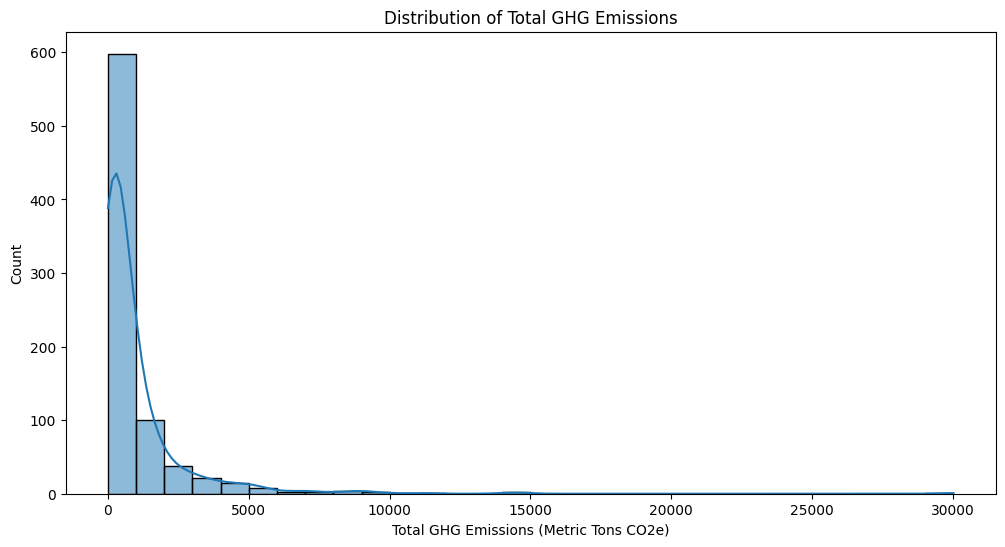

In [6]:
# distributions for key variables
plt.figure(figsize=(12, 6))
sns.histplot(beudo_data['Total GHG Emissions (Metric Tons CO2e)'], bins=30, kde=True)
plt.title('Distribution of Total GHG Emissions')
plt.xlabel('Total GHG Emissions (Metric Tons CO2e)')
plt.show()

The histogram above shows that Total GHG Emissions are highly skewed to the right, with a large concentration of buildings emitting low amounts of CO₂ and a few emitting very high amounts. This suggests that most buildings have relatively low emissions, while a few contribute disproportionately.

- Right-Skewed Distribution: The majority of buildings have emissions close to zero or at the lower end of the scale, with a few extreme outliers going up to around 30,000 metric tons of CO₂.
- Potential for Outlier Influence: The presence of outliers can significantly influence models or analyses. For instance, regression models may be impacted if outliers are not handled appropriately.


## Handling Missingness

In [7]:
missing_data = beudo_data.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
missing_data


Fuel Oil #4 Use (kBtu)                                             851
Fuel Oil #5 & 6 Use (kBtu)                                         851
Fuel Oil #1 Use (kBtu)                                             851
Kerosene Use (kBtu)                                                850
Diesel #2 Use (kBtu)                                               845
Fuel Oil #2 Use (kBtu)                                             843
Electricity Use - Generated From Onsite Renewable Systems (kWh)    816
District Chilled Water Use (kBtu)                                  710
Reported Residential Units                                         679
District Steam Use (kBtu)                                          638
Owner Line 2                                                       595
ENERGY STAR Score                                                  490
Natural Gas Use (therms)                                           211
Natural Gas Use (kBtu)                                             211
PD Par

### Missing Data Analysis

1. Extensive Missing Data (Near 100% Missing):
   - Fuel Oils (Fuel Oil #1, #4, #5 & 6), Kerosene Use (kBtu), and Diesel #2 Use (kBtu):
     - These columns have nearly all values missing (around 845–851 missing values).
     - Plan: Since these columns lack sufficient data and likely represent fuel types rarely used by most properties, we may drop them from our analysis. Imputing would be ineffective due to the minimal data available.

2. Moderately Missing Data (30% - 80% Missing):
   - Onsite Renewable Electricity Generation (kWh), District Chilled Water Use (kBtu), District Steam Use (kBtu):
     - These fields capture energy from alternative or district systems and have significant missing data (30%-50% missing).
     - Plan: Impute missing values where possible, such as using the median or zero (for cases where this represents no use). Alternatively, we could focus on buildings with these data points and analyze separately for a specific subset of buildings if relevant.

   - ENERGY STAR Score:
     - The ENERGY STAR Score has nearly half of its values missing, which limits its use in comprehensive analyses.
     - Plan: If ENERGY STAR Score is crucial for our analysis, we may impute missing values based on similar property types or use it only for buildings with reported values.

3. Partially Missing Data (10% - 30% Missing):
   - Reported Residential Units, Water Use and Intensity, Natural Gas Use (therms, kBtu):
     - These columns have moderate missing data, and they represent important metrics for energy and resource use in properties.
     - Plan: Impute values using the median, or, in cases where properties do not use specific resources (e.g., no natural gas usage), replace missing values with zero.

4. Minimal Missing Data (Less than 10% Missing):
   - Electricity Use (Grid Purchase kWh, kBtu), Site Energy Use (kBtu), Total GHG Emissions (Metric Tons CO2e), EUI (Energy Use Intensity), and Building Characteristics (Year Built, Primary Property Type, GFA, etc.):
     - These fields have relatively few missing values, making them manageable for imputation.
     - Plan: Impute missing values using medians or typical values within each property type, ensuring that we can retain as much data as possible.

5. Non-Numeric Data:
   - Owner Line 2: This field has 595 missing entries, but it may not be essential for analysis.
   - Plan: We can drop this column if it's irrelevant to the analysis or use it only as reference data without imputation.

#### Next Steps for Handling Missing Data

- Drop Columns with Nearly All Missing Data: We will drop columns like fuel oil types and kerosene use, as they have insufficient data for meaningful analysis.
- Impute Partially Missing Values: For moderately missing values in critical columns (e.g., water use, electricity use), we can use median imputation. Zero may also be an option if it represents non-usage.
- Focus Analysis on Key Features: For variables like ENERGY STAR Score, we could either limit analyses to buildings with this data or apply group-based imputation for buildings of similar type, size, or age.


#### Data Imbalance

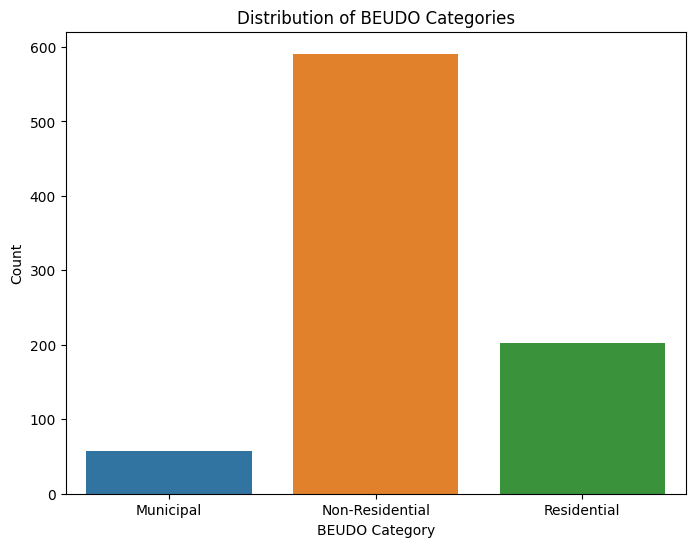

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(data=beudo_data, x='BEUDO Category')
plt.title('Distribution of BEUDO Categories')
plt.xlabel('BEUDO Category')
plt.ylabel('Count')
plt.show()


The bar chart illustrates the distribution of BEUDO Categories—Municipal, Non-Residential, and Residential properties—in the dataset. 

### Analysis of BEUDO Category Distribution

The Distribution of BEUDO Categories chart shows that the dataset is heavily dominated by Non-Residential properties. Here’s a breakdown of what we can observe:

1. Category Imbalance:
   - Non-Residential properties make up the majority of the entries in this dataset.
   - There are significantly fewer Residential and Municipal properties in comparison, indicating a potential imbalance in the dataset.

2. Implications for Analysis:
   - This imbalance means that analyses focused on building type may be skewed by the higher representation of Non-Residential properties.
   - If we want to compare across categories, we may need to apply techniques like stratified sampling to ensure each category is fairly represented in the analysis.

3. Next Steps:
   - We could explore separating analyses by category or creating models specific to each property type to avoid the imbalance affecting our results.
   - Another option would be to oversample the smaller categories or undersample the Non-Residential properties if we need balanced categories for classification tasks.


### Data Scaling

Some features, like energy and water usage, have widely varying scales. We will apply scaling to normalize these features for downstream tasks like clustering or regression.



In [9]:
# columns to scale (for now)
columns_to_scale = [
    'Electricity Use - Grid Purchase (kWh)', 
    'Natural Gas Use (therms)', 
    'Total GHG Emissions (Metric Tons CO2e)', 
    'Water Use (All Water Sources) (kgal)'
]

#  Standard Scaling
scaler = StandardScaler()
beudo_data[columns_to_scale] = scaler.fit_transform(beudo_data[columns_to_scale])

#  scaled data
beudo_data[columns_to_scale].head()


,Electricity Use - Grid Purchase (kWh),Natural Gas Use (therms),Total GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal)
0,-0.586393,NaN,-0.493343,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,-0.502021,NaN
4,NaN,NaN,NaN,NaN


### Data Interpretation (As you can see there are many vals that are still NA, this is to be handled

- **Electricity Use - Grid Purchase (kWh)**, **Natural Gas Use (therms)**, **Total GHG Emissions (Metric Tons CO2e)**, and **Water Use (All Water Sources) (kgal)**:
  - Each value in these columns has been standardized, with a mean of approximately 0 and a standard deviation of 1.
  - The values represent how each entry deviates from the mean usage/emission level across the dataset:
    - Negative values indicate lower-than-average usage or emissions.
    - Positive values would indicate higher-than-average usage or emissions if they appear.


## Summary for data issues 


- Data Missingness: Many columns have missing values, such as PD Parcel Units (169 missing), Year Built (40 missing), and several energy-related columns like Electricity Use - Grid Purchase (kWh) and Natural Gas Use (therms). Some fields, such as Fuel Oil #1 Use (kBtu), Fuel Oil #4 Use (kBtu), and Kerosene Use (kBtu), have almost no data, with most values missing.
- Data Imbalance: While data imbalance is generally a classification problem concern, here, columns like ENERGY STAR Score and Total GHG Emissions have values for only a portion of buildings, potentially limiting the types of analyses we can conduct. We may have an imbalance in BEUDO Category between Municipal, Residential, and Non-Residential properties, which could affect analyses if certain types are underrepresented.


- Data Scaling: Some columns (like Electricity Use - Grid Purchase (kWh), Water Use (kgal), and Total GHG Emissions) have wide ranges, making scaling important for analyses such as clustering or regression We will likely need to standardize or normalize columns with high variance to ensure no single feature disproportionately influences the model.


### Plans to Address Data Issues
- Handling Missing Data: For columns with a high proportion of missing values (e.g., Fuel Oil #1 Use (kBtu)), we will likely drop them from analysis, as imputing values for sparse data could introduce bias. For other missing values, such as in ENERGY STAR Score and Natural Gas Use, we may use median imputation or domain-relevant approaches, especially if the values missing represent non-reporting rather than genuine absence of use.

- Addressing Data Imbalance: For analyses involving categories, we will inspect the distribution of BEUDO Category and use stratified sampling or group-wise normalization if needed. We may need to downsample or group underrepresented categories for effective comparisons.


- Scaling Data: We plan to standardize continuous variables with large ranges using methods like StandardScaler from Scikit-learn. This will help with models like regression or clustering, ensuring that large-scale features (e.g., energy use) don’t dominate others. This approach should help us prepare the dataset for meaningful analysis. Let me know if you’d like the specific code cells included for each of these steps.


In [10]:
beudo_data.to_csv('cleaned_data.csv', index=False)